Imports models: (LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, SupportVectorMachine, GaussianNB, MultinomialNb, BernouliNB, AdaBoostClaassifier)

In [39]:
import numpy as np
import pandas as pd
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score, log_loss
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

#
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier

- Read files


In [40]:
dataframe = pd.read_csv("C:/Users/Rohan Mahesh Rao/Desktop/Dip/Image-Despeckling/spreadsheets/Dataset_new.csv")
dataframe.head()

,Image_number,Hue,Sat,Val,SSIM,Kernel_width
0,1,5,8,5,0.505,7
1,2,5,8,6,0.476,7
2,3,5,6,6,0.529,7
3,4,5,8,4,0.431,8
4,5,5,8,3,0.508,8


- Preprocessing

In [41]:
dataframe = dataframe.sample(frac = 1) # to shuffle the dataset 
y = dataframe['Kernel_width']
feature_names = ['Hue','Sat','Val']
x = dataframe[feature_names]
x.head()

,Hue,Sat,Val
220,5,8,7
53,5,7,7
504,5,8,7
1364,5,6,7
653,5,5,5


Train-Test split

In [42]:
x = np.asarray(x).astype('float32')
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.01, shuffle=True)

Fitting and Defining Classifier functions

In [43]:

model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4 = SVC()
model5 = GaussianNB()
model6 = MultinomialNB()
model7 = BernoulliNB()
model8 = AdaBoostClassifier()

model_list = [model1,model2,model3,model4,model5,model6,model7,model8]

#training
model1.fit(x_train, y_train)
pred1 = model1.predict(x_test)
model2.fit(x_train, y_train)
pred2 = model2.predict(x_test)
model3.fit(x_train, y_train)
pred3 = model3.predict(x_test)
model4.fit(x_train, y_train)
pred4 = model4.predict(x_test)
model5.fit(x_train, y_train)
pred5 = model5.predict(x_test)
model6.fit(x_train, y_train)
pred6 = model6.predict(x_test)
model7.fit(x_train, y_train)
pred7 = model7.predict(x_test)
model8.fit(x_train, y_train)
pred8 = model8.predict(x_test)

def get_kernel1(x_given):
    return model1.predict(x_given)
def get_kernel2(x_given):
    return model2.predict(x_given)
def get_kernel3(x_given):
    return model3.predict(x_given)
def get_kernel4(x_given):
    return model4.predict(x_given)
def get_kernel5(x_given):
    return model5.predict(x_given)
def get_kernel6(x_given):
    return model6.predict(x_given)
def get_kernel7(x_given):
    return model7.predict(x_given)
def get_kernel8(x_given):
    return model8.predict(x_given)

c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predicting widow size for filter using the models defined above

In [44]:
hsv_inputs = open("C:/Users/Rohan Mahesh Rao/Desktop/Dip/Image-Despeckling/hsv_inputs.txt","r")
x_inp = str(hsv_inputs.read())
x_given = []

for i in range (0,3):
    x_given.append(int(x_inp[i]))

print(x_given)

pre1 = get_kernel1([x_given])
print("Predicted kernel size for 1 :",round(pre1[0]))
pre2 = get_kernel2([x_given])
print("Predicted kernel size for 2 :",round(pre2[0]))
pre3 = get_kernel3([x_given])
print("Predicted kernel size for 3 :",round(pre3[0]))
pre4 = get_kernel4([x_given])
print("Predicted kernel size for 4 :",round(pre4[0]))
pre5 = get_kernel5([x_given])
print("Predicted kernel size for 5 :",round(pre5[0]))
pre6 = get_kernel6([x_given])
print("Predicted kernel size for 6 :",round(pre6[0]))
pre7 = get_kernel7([x_given])
print("Predicted kernel size for 7 :",round(pre7[0]))
pre8 = get_kernel8([x_given])
print("Predicted kernel size for 8 :",round(pre8[0]))


[5, 6, 6]
Predicted kernel size for 1 : 8
Predicted kernel size for 2 : 8
Predicted kernel size for 3 : 8
Predicted kernel size for 4 : 8
Predicted kernel size for 5 : 8
Predicted kernel size for 6 : 8
Predicted kernel size for 7 : 8
Predicted kernel size for 8 : 8


Performance Metrics (MeanSquaredError, RootMeanSquareError, MeanAbsoluteError, R2score)

In [45]:
# # Calculating MeanSquaredError

# preds = [pred1, pred2, pred3, pred4, pred5, pred6, pred7, pred8]
# mses = []

# for pred in preds:
#     mse = mean_squared_error(y_test, pred)
#     mses.append(mse)

# print(mses)

# # Calculating RootMeanSquaredError

# rmses = []

# for mse in mses:
#     rms = np.sqrt(mse)
#     rmses.append(rms)

# print(rmses)

# # Calculating MeanAbsoluteError

# maes = []

# for pred in preds:
#     mae = mean_absolute_error(y_test, pred)
#     maes.append(mae)

# print(maes)


# #Calculating R2Score
# r2s = []

# for pred in preds:
#     r2 = r2_score(y_test, pred)
#     r2s.append(r2)

# print(r2s)

error_table = PrettyTable()
error_table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "MSE", "RMSE", "MAE", "R2 Score"]

models = [model1, model2, model3, model4, model5, model6, model7, model8]
preds = [pred1, pred2, pred3, pred4, pred5, pred6, pred7, pred8]

for model, pred in zip(models, preds):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    error_table.add_row([model.__class__.__name__, accuracy, precision, recall, f1, mse, rmse, mae, r2])

print(error_table)



+------------------------+---------------------+--------------------+---------------------+---------------------+---------------------+---------------------+---------------------+----------------------+
|         Model          |       Accuracy      |     Precision      |        Recall       |       F1 Score      |         MSE         |         RMSE        |         MAE         |       R2 Score       |
+------------------------+---------------------+--------------------+---------------------+---------------------+---------------------+---------------------+---------------------+----------------------+
|   LogisticRegression   |  0.7647058823529411 | 0.5847750865051903 |  0.7647058823529411 |  0.6627450980392157 | 0.23529411764705882 | 0.48507125007266594 | 0.23529411764705882 | -0.3076923076923075  |
| DecisionTreeClassifier |  0.8235294117647058 | 0.8907563025210083 |  0.8235294117647058 |  0.8366013071895425 |  0.6470588235294118 |  0.8043996665398437 | 0.29411764705882354 |  -2.5961

c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\metrics

Data Visualisation

c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in

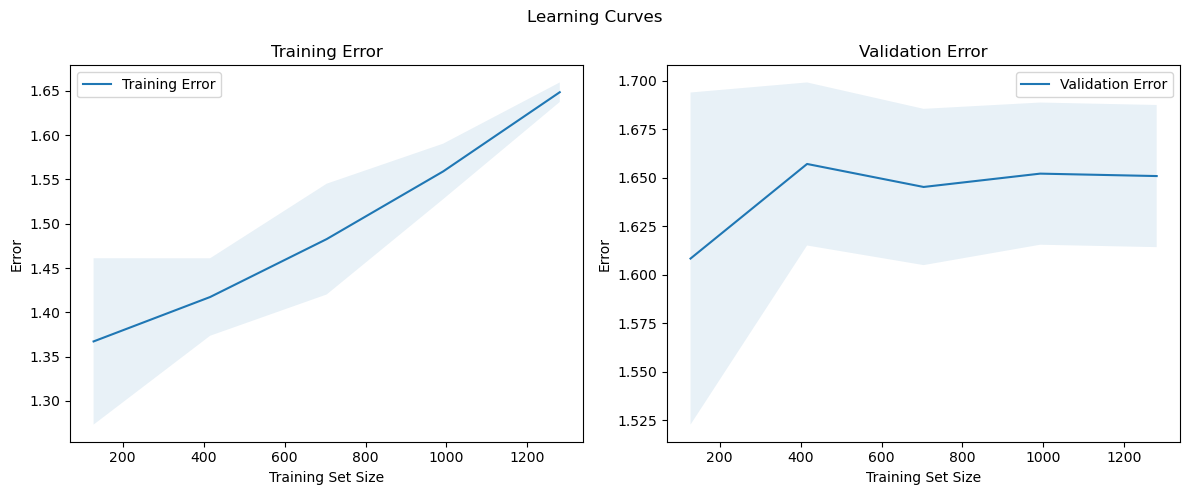

c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


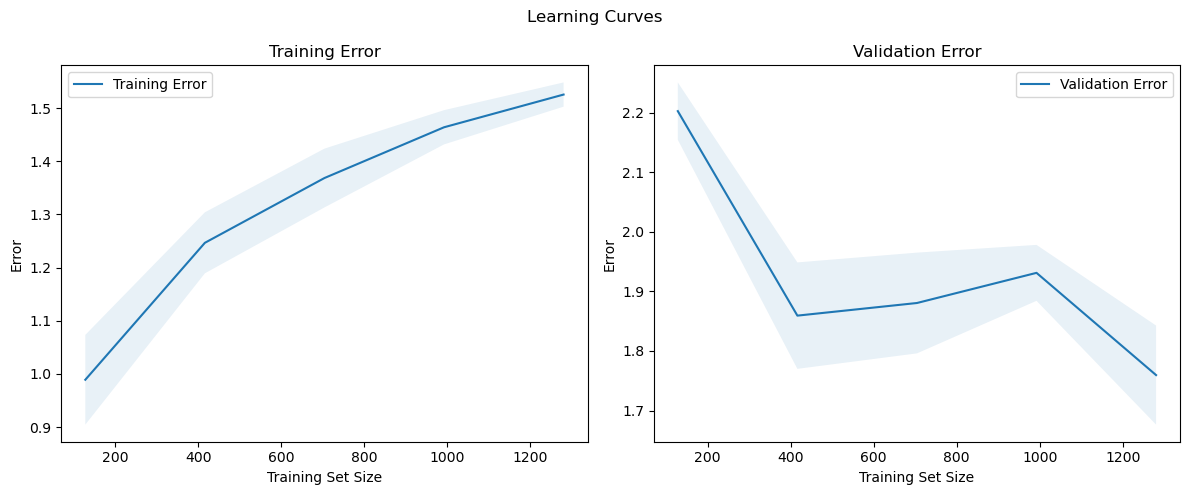

c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


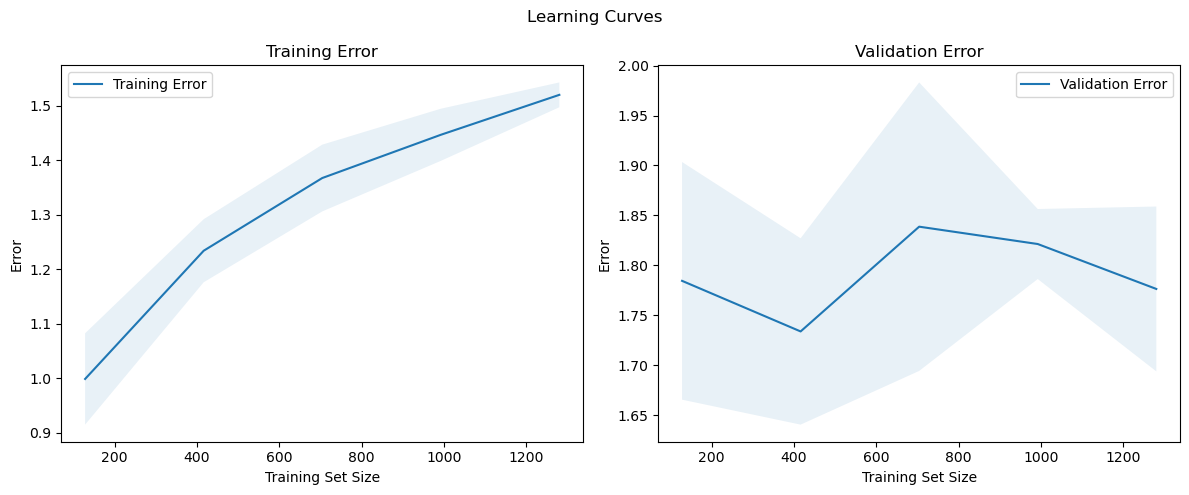

c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


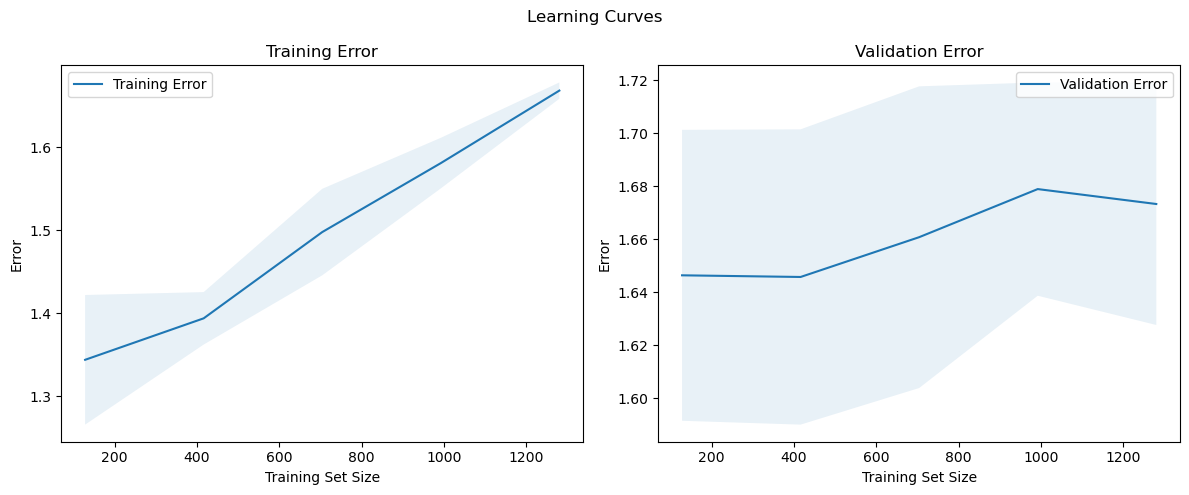

c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


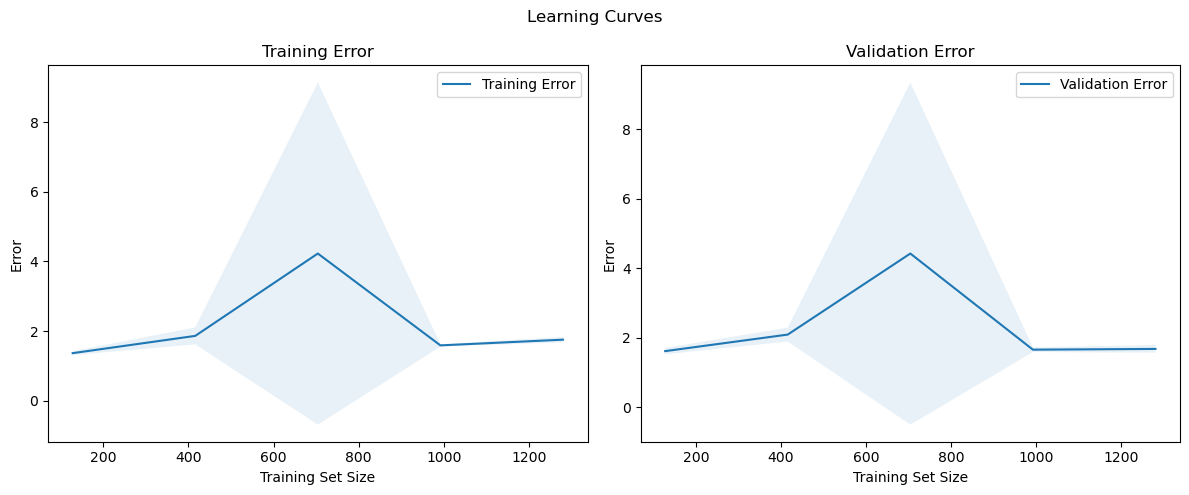

c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


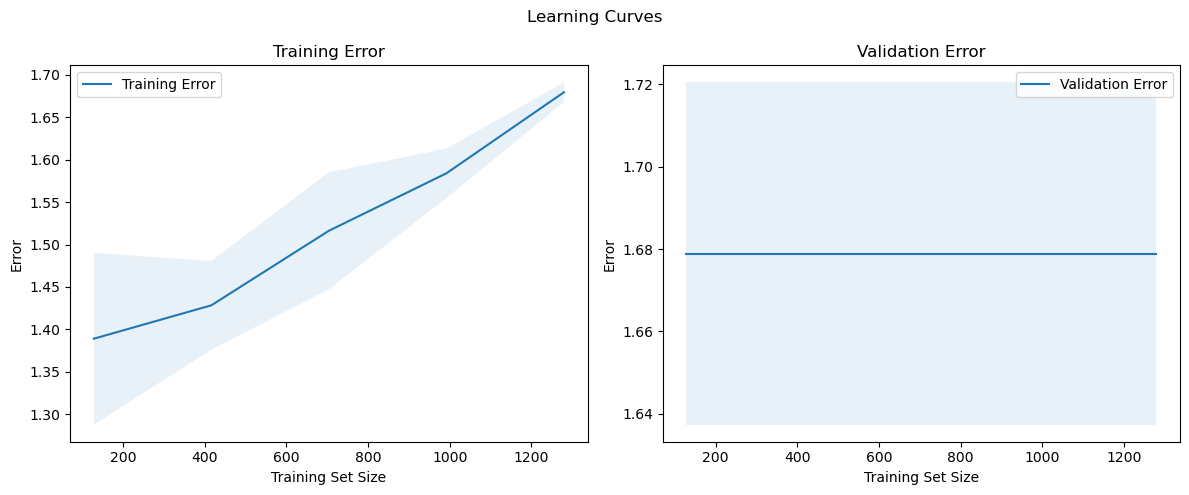

c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


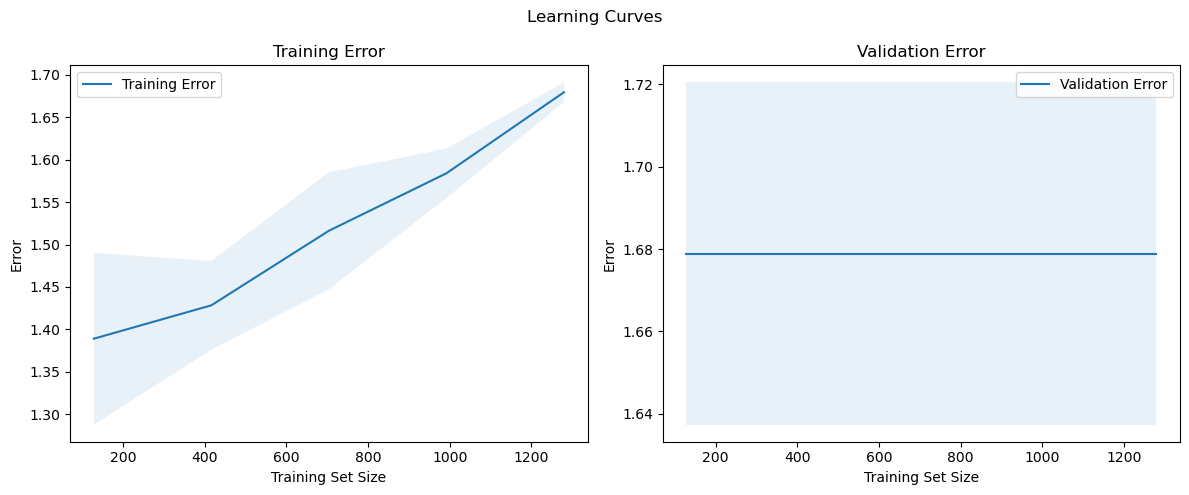

c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Rohan Mahesh Rao\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


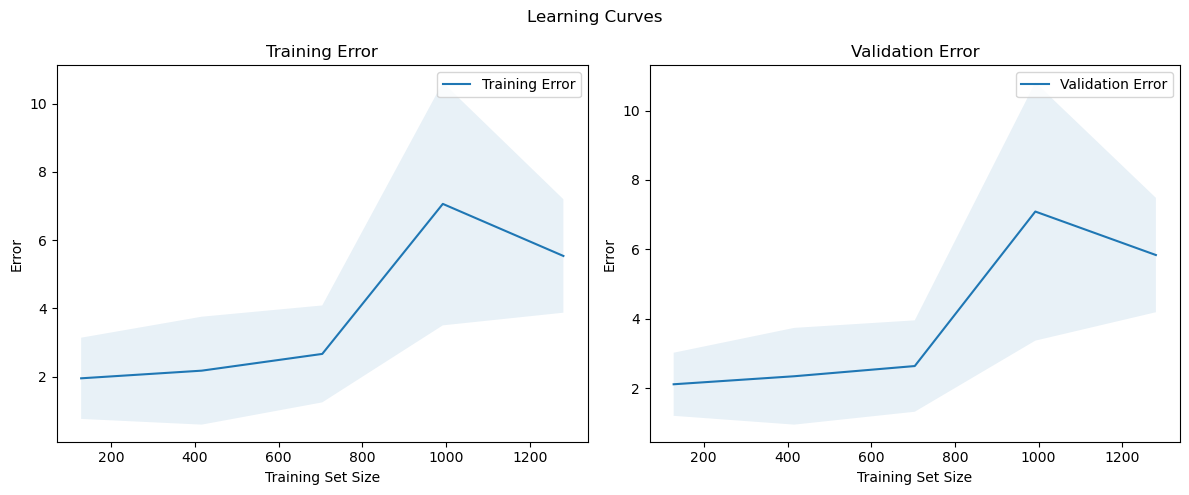

In [46]:

def plot_learning_curves(classifier, x, y):
    plt.figure(figsize=(12, 5))

    # Plot for Training Error
    plt.subplot(1, 2, 1)
    train_sizes, train_scores, _ = learning_curve(classifier, x, y, cv=5, scoring='neg_mean_squared_error')
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='Training Error')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)

    # Plot for Validation Error
    plt.subplot(1, 2, 2)
    _, _, valid_scores = learning_curve(classifier, x, y, cv=5, scoring='neg_mean_squared_error')
    valid_mean = -np.mean(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)
    plt.plot(train_sizes, valid_mean, label='Validation Error')
    plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)

    # Set titles, labels, and legends
    plt.suptitle('Learning Curves')
    plt.subplot(1, 2, 1)
    plt.title('Training Error')
    plt.xlabel('Training Set Size')
    plt.ylabel('Error')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.title('Validation Error')
    plt.xlabel('Training Set Size')
    plt.ylabel('Error')
    plt.legend()

    plt.tight_layout()
    plt.show()


for model in model_list:
    plot_learning_curves(model, x, y)


